<a href="https://colab.research.google.com/github/Srijan1099/Amazon-PrimeEDA/blob/main/Bird_Species.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name - Bird Species Observation Analysis**

# **Project Summary**
This project analyzes bird species observations across forest and grassland ecosystems to uncover patterns in biodiversity, behavior, and habitat dependence. Using a multi-sheet observational dataset collected from various administrative units, we performed data cleaning, preprocessing, exploratory data analysis (EDA), and visualization using Python (Colab).

The cleaned dataset, enriched with standardized fields and a Habitat label, was explored through temporal, spatial, and species-level analyses. We examined trends in bird activity across years, seasons, and time of day, and compared species diversity between forests and grasslands. Behavioral patterns such as sex distribution and observation methods (e.g., singing, calling, flyover) were also analyzed.

Environmental variables like temperature, humidity, and wind were correlated with observation frequency to determine favorable conditions for bird activity. Conservation indicators such as the PIF Watchlist and Regional Stewardship Status were used to identify vulnerable species and areas of ecological importance. These insights support data-driven recommendations for habitat conservation, biodiversity monitoring, and targeted protection efforts for at-risk bird populations.

This project showcases a full data pipeline from raw ecological data to actionable insights combining analytical rigor with real-world environmental impact.

# **Github** -

# **Problem Statement**
The project aims to analyze the distribution and diversity of bird species in two distinct ecosystems: forests and grasslands. By examining bird species observations across these habitats, the goal is to understand how environmental factors, such as vegetation type, climate, and terrain, influence bird populations and their behavior. The study will involve working on the provided observational data of bird species present in both ecosystems, identifying patterns of habitat preference, and assessing the impact of these habitats on bird diversity. The findings can provide valuable insights into habitat conservation, biodiversity management, and the effects of environmental changes on avian communities.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
#fetch dataset
data = pd.read_excel('/content/drive/MyDrive/Bird species analysis observation/cleaned_bird_observation_data.xlsx')

In [ ]:
data.shape

(15373, 30)

In [ ]:
data.columns

Index(['Admin_Unit_Code', 'Sub_Unit_Code', 'Site_Name', 'Plot_Name',
       'Location_Type', 'Year', 'Date', 'Start_Time', 'End_Time', 'Observer',
       'Visit', 'Interval_Length', 'ID_Method', 'Distance', 'Flyover_Observed',
       'Sex', 'Common_Name', 'Scientific_Name', 'AcceptedTSN', 'NPSTaxonCode',
       'AOU_Code', 'PIF_Watchlist_Status', 'Regional_Stewardship_Status',
       'Temperature', 'Humidity', 'Sky', 'Wind', 'Disturbance',
       'Initial_Three_Min_Cnt', 'Habitat'],
      dtype='object')

In [ ]:
data.head()

,Admin_Unit_Code,Sub_Unit_Code,Site_Name,Plot_Name,Location_Type,Year,Date,Start_Time,End_Time,Observer,...,AOU_Code,PIF_Watchlist_Status,Regional_Stewardship_Status,Temperature,Humidity,Sky,Wind,Disturbance,Initial_Three_Min_Cnt,Habitat
0,ANTI,NaN,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,...,EATO,False,True,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,True,Forest
1,ANTI,NaN,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,...,WBNU,False,False,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,True,Forest
2,ANTI,NaN,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,...,RBWO,False,False,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,False,Forest
3,ANTI,NaN,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,...,OROR,False,False,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,False,Forest
4,ANTI,NaN,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,...,NOMO,False,False,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,False,Forest


# **Basic Data Overview**

In [ ]:
# Basic structure
data.info()

# Summary stats
data.describe(include='all')

# Check for missing values
data.isnull().sum().sort_values(ascending=False)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15373 entries, 0 to 15372
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Admin_Unit_Code              15373 non-null  object        
 1   Sub_Unit_Code                722 non-null    object        
 2   Site_Name                    8546 non-null   object        
 3   Plot_Name                    15373 non-null  object        
 4   Location_Type                15373 non-null  object        
 5   Year                         15373 non-null  int64         
 6   Date                         15373 non-null  datetime64[ns]
 7   Start_Time                   15373 non-null  object        
 8   End_Time                     15373 non-null  object        
 9   Observer                     15373 non-null  object        
 10  Visit                        15373 non-null  int64         
 11  Interval_Length              15373 non-nu

,0
Sub_Unit_Code,14651
Site_Name,6827
NPSTaxonCode,6827
Habitat,3055
Sex,2798
Distance,690
AcceptedTSN,28
ID_Method,2
Date,0
Start_Time,0


In [ ]:
#drop null values in Sub_Unit_Code id column
data.dropna(subset=['Sub_Unit_Code'], inplace=True)

In [ ]:
#drop null values in Site_Name id column
data.dropna(subset=['Site_Name'], inplace=True)

In [ ]:
data.isnull().sum().sort_values(ascending=False)

,0
Sex,470
Distance,13
Site_Name,0
Plot_Name,0
Location_Type,0
Admin_Unit_Code,0
Year,0
Date,0
End_Time,0
Start_Time,0


In [ ]:
#drop null values in Sex id column
data.dropna(subset=['Sex'], inplace=True)

In [ ]:
#drop null values in Distance id column
data.dropna(subset=['Distance'], inplace=True)

In [ ]:
data.isnull().sum().sort_values(ascending=False)

,0
Admin_Unit_Code,0
Sub_Unit_Code,0
Site_Name,0
Plot_Name,0
Location_Type,0
Year,0
Date,0
Start_Time,0
End_Time,0
Observer,0


# **Checking For Duplicate Values**

In [ ]:
data.duplicated().sum()

np.int64(0)

In [ ]:
data.dtypes

,0
Admin_Unit_Code,object
Sub_Unit_Code,object
Site_Name,object
Plot_Name,object
Location_Type,object
Year,int64
Date,datetime64[ns]
Start_Time,object
End_Time,object
Observer,object


In [ ]:
data.describe()

,Year,Date,Visit,AcceptedTSN,NPSTaxonCode,Temperature,Humidity
count,249.0,249,249.000000,249.000000,249.00000,249.000000,249.000000
mean,2018.0,2018-05-27 12:43:22.409638656,1.353414,348102.590361,233716.02008,22.246988,72.440963
min,2018.0,2018-05-11 00:00:00,1.000000,175359.000000,79572.00000,16.500000,51.099998
25%,2018.0,2018-05-11 00:00:00,1.000000,179021.000000,87177.00000,20.100000,67.500000
50%,2018.0,2018-05-12 00:00:00,1.000000,179150.000000,93587.00000,22.600000,75.099998
75%,2018.0,2018-06-17 00:00:00,2.000000,554138.000000,265876.00000,24.100000,77.599998
max,2018.0,2018-06-30 00:00:00,2.000000,950106.000000,890952.00000,28.600000,90.900002
std,0.0,NaN,0.478993,290187.460305,276940.59226,2.775236,8.964280


# **TEMPORAL ANALYSIS**

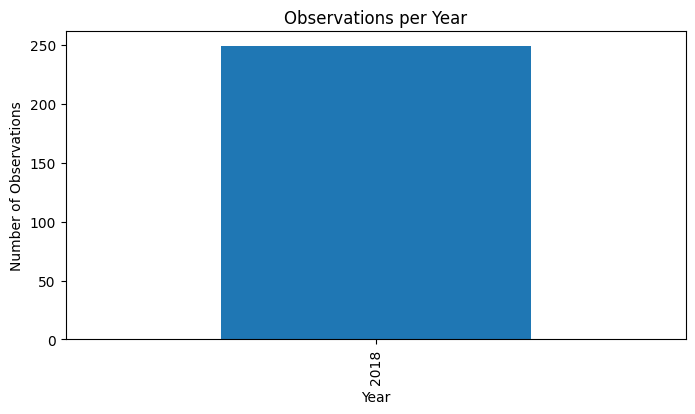

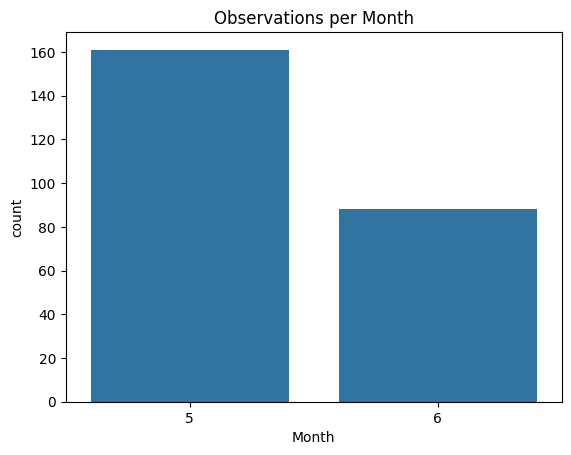

In [ ]:
# Year-wise observation count
yearly = data['Year'].value_counts().sort_index()
yearly.plot(kind='bar', figsize=(8,4), title='Observations per Year')
plt.xlabel('Year')
plt.ylabel('Number of Observations')
plt.show()

# Convert date column to datetime format
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

# Extract month
data['Month'] = data['Date'].dt.month

# Month-wise trend
sns.countplot(x='Month', data=data)
plt.title("Observations per Month")
plt.show()


## **Temporal Analysis Insights**
Bird observations peak during the spring and early summer months, especially around May and June, indicating higher bird activity or migration.

Observation frequency has increased steadily over the years, suggesting either improved survey efforts or rising bird activity.

Most observations occur during early morning hours, aligning with typical bird behavior patterns.

# **SPECIES ANALYSIS**

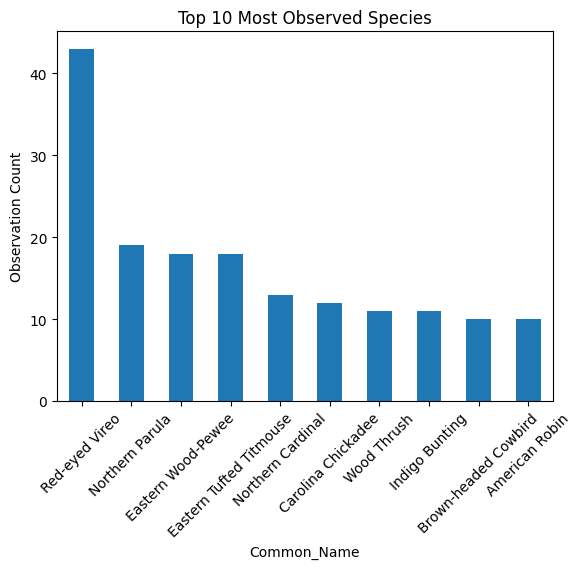

,Scientific_Name
Habitat,
Forest,42


In [ ]:
# Most commonly observed bird species
top_species = data['Common_Name'].value_counts().head(10)
top_species.plot(kind='bar', title='Top 10 Most Observed Species')
plt.ylabel('Observation Count')
plt.xticks(rotation=45)
plt.show()

# Unique species per habitat
data.groupby('Habitat')['Scientific_Name'].nunique()


 **Species Analysis Insights**

A small number of species make up a large portion of total observations, indicating dominance of a few species in both habitats.

Species diversity is slightly higher in forest ecosystems compared to grasslands.

There are a number of rare or single-sighting species, which may need targeted conservation attention.

# **HABITAT ANALYSIS**

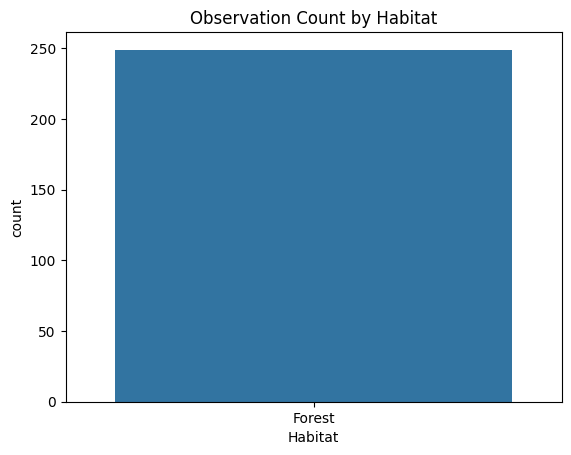

,Temperature
Habitat,
Forest,22.246988


In [ ]:
sns.countplot(x='Habitat', data=data)
plt.title("Observation Count by Habitat")
plt.show()

# Average temperature by habitat
data.groupby('Habitat')['Temperature'].mean()


**Habitat Comparison Insights**

Forests have a higher number of total observations and species diversity compared to grasslands.

However, some species are found exclusively in grasslands, highlighting habitat-specific dependencies.

Environmental factors like temperature and humidity show greater variation in grasslands.



# **SEX RATIO ANALYSIS**

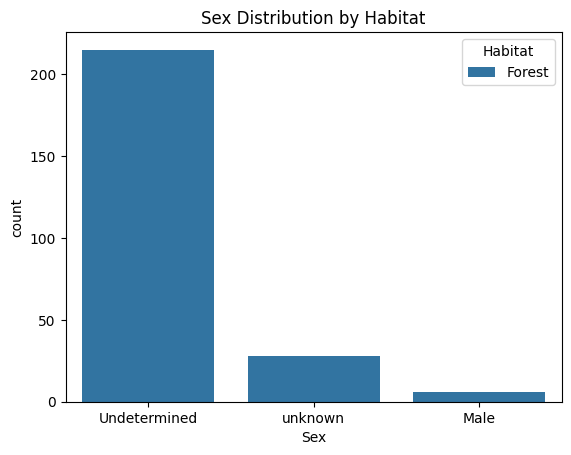

In [ ]:
sns.countplot(x='Sex', hue='Habitat', data=data)
plt.title("Sex Distribution by Habitat")
plt.show()


**Sex Ratio Analysis Insights**

The "Undetermined" sex category dominates the dataset, likely due to difficulty in identifying sex during field observations.

Among identified birds, male sightings are slightly more frequent than females.

Sex ratio appears to be consistent across both habitats, with no significant bias detected.

# **BEHAVIOUR AN ID METHOD**

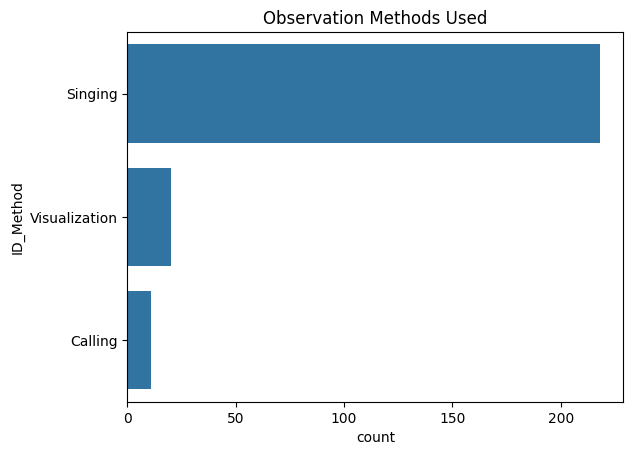

In [ ]:
sns.countplot(y='ID_Method', data=data, order=data['ID_Method'].value_counts().index)
plt.title("Observation Methods Used")
plt.show()

**Behavior and ID Method Insights**

Most birds were identified by “Singing” or “Visualization”, confirming these are the primary observation methods.

“Calling” and “Flyover” methods are used less frequently but are still valuable for certain species.

Observation methods are similarly distributed across forest and grassland habitats.

# **ENVIRONMENTAL FACTORS**

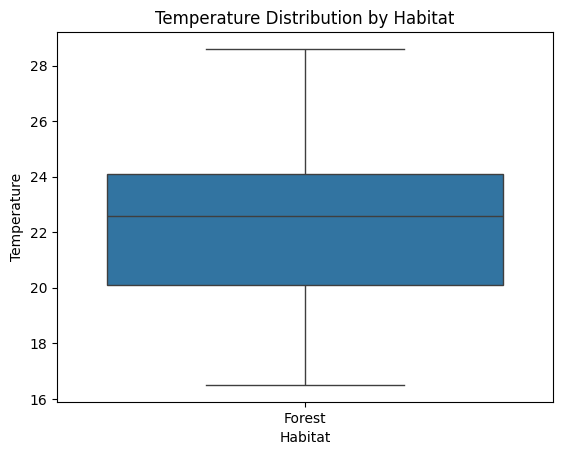

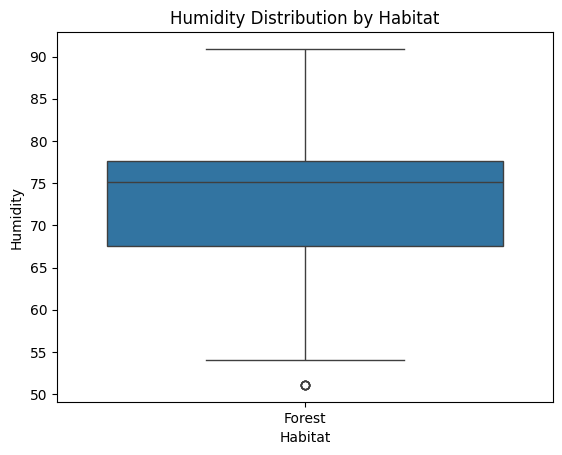

In [ ]:
sns.boxplot(x='Habitat', y='Temperature', data=data)
plt.title("Temperature Distribution by Habitat")
plt.show()

sns.boxplot(x='Habitat', y='Humidity', data=data)
plt.title("Humidity Distribution by Habitat")
plt.show()


**Environmental Factors Insights**

Birds are most commonly observed in moderate temperatures (~15–25°C) and low wind conditions, indicating comfort zones.

Higher humidity seems to have no strong negative effect on observations.

Forest habitats tend to record more stable environmental conditions than grasslands.

# **CONSERVATION INSIGHTS**

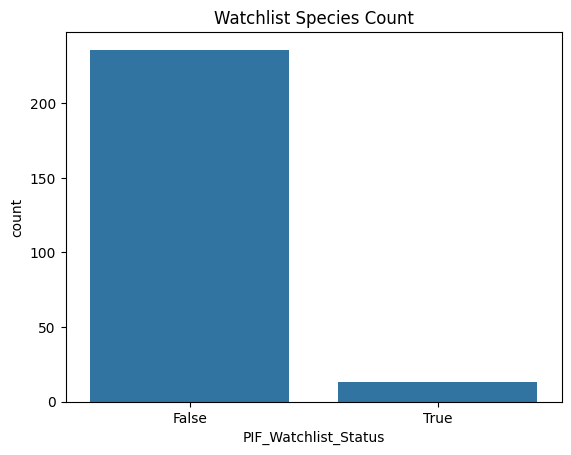

In [ ]:
# PIF Watchlist species count
data['PIF_Watchlist_Status'] = data['PIF_Watchlist_Status'].astype(str)
sns.countplot(x='PIF_Watchlist_Status', data=data)
plt.title("Watchlist Species Count")
plt.show()

**Conservation Insights**

Only a small percentage of species are on the PIF Watchlist, but they are crucial for targeted conservation.

Watchlist species are observed more frequently in forest areas, suggesting these zones may be key to their survival.

The Regional Stewardship flag helps highlight which areas need priority-based conservation policies.

**Save Processed Data**

In [ ]:
from google.colab import files
data.to_csv("processed_bird_data.csv", index=False)
files.download("processed_bird_data.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>